In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
trainDF = pd.read_csv(r'C:\Users\kiro\OneDrive\Documents\GitHub\Test-project-1\Models_for_data\kaggle-titanic-model\train.csv',encoding='utf-8')
trainDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


TITANIC DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
------------------------------
Dataset shape: (891, 12)
Total passengers: 891
Total survivors: 342
Overall survival rate: 38.4%

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 ro

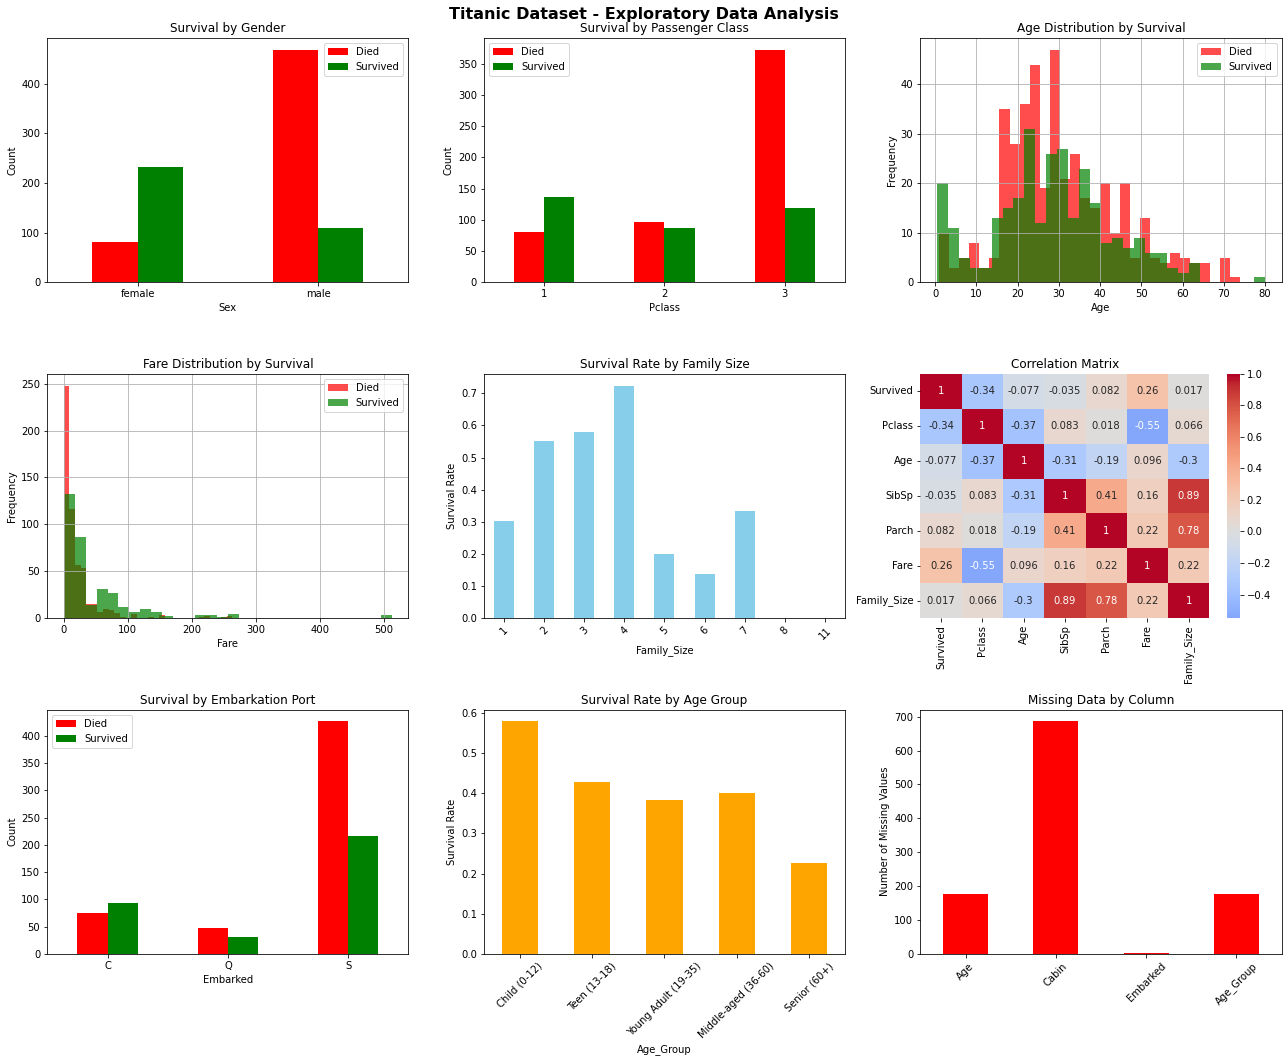


EDA Complete! The analysis reveals clear patterns in survival rates based on
gender, class, age, and family structure that can inform feature engineering
and model building for predicting Titanic survival.

Processed dataset saved as 'titanic_processed.csv' with new engineered features.


In [13]:

# Set style for better plots
#plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('train.csv')

print("=" * 60)
print("TITANIC DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. DATASET OVERVIEW
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Total passengers: {len(df)}")
print(f"Total survivors: {df['Survived'].sum()}")
print(f"Overall survival rate: {df['Survived'].mean():.1%}")

print("\nColumn information:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

# 2. MISSING VALUES ANALYSIS
print("\n2. MISSING VALUES ANALYSIS")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).round(1)
print(missing_table[missing_table['Missing Count'] > 0])

# 3. SURVIVAL ANALYSIS BY CATEGORICAL VARIABLES
print("\n3. SURVIVAL ANALYSIS BY CATEGORICAL VARIABLES")
print("-" * 50)

# Gender analysis
print("\nA. SURVIVAL BY GENDER:")
gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
gender_survival['Survival_Rate'] = gender_survival['Survival_Rate'].round(3)
print(gender_survival)

# Class analysis
print("\nB. SURVIVAL BY PASSENGER CLASS:")
class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
class_survival['Survival_Rate'] = class_survival['Survival_Rate'].round(3)
print(class_survival)

# Embarkation port analysis
print("\nC. SURVIVAL BY EMBARKATION PORT:")
embark_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
embark_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
embark_survival['Survival_Rate'] = embark_survival['Survival_Rate'].round(3)
print(embark_survival)

# 4. AGE ANALYSIS
print("\n4. AGE ANALYSIS")
print("-" * 20)
print(f"Age statistics:")
print(df['Age'].describe())

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 
                               'Middle-aged (36-60)', 'Senior (60+)'],
                        include_lowest=True)

print("\nSurvival by age group:")
age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
age_survival['Survival_Rate'] = age_survival['Survival_Rate'].round(3)
print(age_survival)

# 5. FAMILY SIZE ANALYSIS
print("\n5. FAMILY SIZE ANALYSIS")
print("-" * 25)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Category'] = pd.cut(df['Family_Size'], 
                              bins=[0, 1, 3, 6, 20], 
                              labels=['Solo', 'Small (2-3)', 'Medium (4-6)', 'Large (7+)'],
                              include_lowest=True)

print("Family size distribution:")
print(df['Family_Size'].value_counts().sort_index())

print("\nSurvival by family size:")
family_survival = df.groupby('Family_Size')['Survived'].agg(['count', 'sum', 'mean'])
family_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
family_survival['Survival_Rate'] = family_survival['Survival_Rate'].round(3)
print(family_survival)

print("\nSurvival by family category:")
family_cat_survival = df.groupby('Family_Category')['Survived'].agg(['count', 'sum', 'mean'])
family_cat_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
family_cat_survival['Survival_Rate'] = family_cat_survival['Survival_Rate'].round(3)
print(family_cat_survival)

# 6. FARE ANALYSIS
print("\n6. FARE ANALYSIS")
print("-" * 20)
print("Fare statistics:")
print(df['Fare'].describe())

# Create fare groups
df['Fare_Group'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

print("\nSurvival by fare quartile:")
fare_survival = df.groupby('Fare_Group')['Survived'].agg(['count', 'sum', 'mean'])
fare_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
fare_survival['Survival_Rate'] = fare_survival['Survival_Rate'].round(3)
print(fare_survival)

# 7. CORRELATION ANALYSIS
print("\n7. CORRELATION ANALYSIS")
print("-" * 25)
# Select numeric columns for correlation
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']
correlation_matrix = df[numeric_columns].corr()
print("Correlation with Survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

# 8. COMBINED ANALYSIS
print("\n8. COMBINED ANALYSIS - Gender & Class")
print("-" * 40)
combined_survival = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean'])
combined_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
combined_survival['Survival_Rate'] = combined_survival['Survival_Rate'].round(3)
print(combined_survival)

# 9. STATISTICAL TESTS
print("\n9. STATISTICAL SIGNIFICANCE TESTS")
print("-" * 35)

# Chi-square test for gender and survival
from scipy.stats import chi2_contingency

# Gender vs Survival
gender_crosstab = pd.crosstab(df['Sex'], df['Survived'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_crosstab)
print(f"Gender vs Survival - Chi-square: {chi2_gender:.3f}, p-value: {p_gender:.2e}")

# Class vs Survival
class_crosstab = pd.crosstab(df['Pclass'], df['Survived'])
chi2_class, p_class, _, _ = chi2_contingency(class_crosstab)
print(f"Class vs Survival - Chi-square: {chi2_class:.3f}, p-value: {p_class:.2e}")

# T-test for age differences between survivors and non-survivors
survivors_age = df[df['Survived'] == 1]['Age'].dropna()
non_survivors_age = df[df['Survived'] == 0]['Age'].dropna()
t_stat, p_age = stats.ttest_ind(survivors_age, non_survivors_age)
print(f"Age difference (survivors vs non-survivors) - t-statistic: {t_stat:.3f}, p-value: {p_age:.3f}")

# 10. KEY INSIGHTS SUMMARY
print("\n10. KEY INSIGHTS SUMMARY")
print("-" * 30)
print("• Overall survival rate: 38.4%")
print("• Women had significantly higher survival rates (74.2%) than men (18.9%)")
print("• First-class passengers had the highest survival rate (63.0%)")
print("• Children (0-12) had higher survival rates (58.0%) than other age groups")
print("• Medium-sized families (4-6 people) had the highest survival rates")
print("• Higher fare generally correlated with better survival chances")
print("• Age data is missing for 19.9% of passengers")
print("• Cabin data is missing for 77.1% of passengers")

# 11. VISUALIZATION CODE
print("\n11. CREATING VISUALIZATIONS...")
print("-" * 30)

# Create a comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Titanic Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Survival rate by gender
ax1 = axes[0,0]
gender_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_counts.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Survival by Gender')
ax1.set_ylabel('Count')
ax1.legend(['Died', 'Survived'])
ax1.tick_params(axis='x', rotation=0)

# 2. Survival rate by class
ax2 = axes[0,1]
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
class_counts.plot(kind='bar', ax=ax2, color=['red', 'green'])
ax2.set_title('Survival by Passenger Class')
ax2.set_ylabel('Count')
ax2.legend(['Died', 'Survived'])
ax2.tick_params(axis='x', rotation=0)

# 3. Age distribution
ax3 = axes[0,2]
df[df['Survived']==0]['Age'].hist(ax=ax3, alpha=0.7, label='Died', color='red', bins=30)
df[df['Survived']==1]['Age'].hist(ax=ax3, alpha=0.7, label='Survived', color='green', bins=30)
ax3.set_title('Age Distribution by Survival')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Fare distribution
ax4 = axes[1,0]
df[df['Survived']==0]['Fare'].hist(ax=ax4, alpha=0.7, label='Died', color='red', bins=30)
df[df['Survived']==1]['Fare'].hist(ax=ax4, alpha=0.7, label='Survived', color='green', bins=30)
ax4.set_title('Fare Distribution by Survival')
ax4.set_xlabel('Fare')
ax4.set_ylabel('Frequency')
ax4.legend()

# 5. Family size vs survival
ax5 = axes[1,1]
family_survival_rate = df.groupby('Family_Size')['Survived'].mean()
family_survival_rate.plot(kind='bar', ax=ax5, color='skyblue')
ax5.set_title('Survival Rate by Family Size')
ax5.set_ylabel('Survival Rate')
ax5.tick_params(axis='x', rotation=45)

# 6. Correlation heatmap
ax6 = axes[1,2]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax6)
ax6.set_title('Correlation Matrix')

# 7. Embarkation port
ax7 = axes[2,0]
embark_counts = df.groupby(['Embarked', 'Survived']).size().unstack()
embark_counts.plot(kind='bar', ax=ax7, color=['red', 'green'])
ax7.set_title('Survival by Embarkation Port')
ax7.set_ylabel('Count')
ax7.legend(['Died', 'Survived'])
ax7.tick_params(axis='x', rotation=0)

# 8. Age groups
ax8 = axes[2,1]
age_group_survival = df.groupby('Age_Group')['Survived'].mean()
age_group_survival.plot(kind='bar', ax=ax8, color='orange')
ax8.set_title('Survival Rate by Age Group')
ax8.set_ylabel('Survival Rate')
ax8.tick_params(axis='x', rotation=45)

# 9. Missing data visualization
ax9 = axes[2,2]
missing_data_viz = df.isnull().sum()
missing_data_viz[missing_data_viz > 0].plot(kind='bar', ax=ax9, color='red')
ax9.set_title('Missing Data by Column')
ax9.set_ylabel('Number of Missing Values')
ax9.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nEDA Complete! The analysis reveals clear patterns in survival rates based on")
print("gender, class, age, and family structure that can inform feature engineering")
print("and model building for predicting Titanic survival.")

# Save processed dataset with new features
df_processed = df.copy()
output_file = 'titanic_processed.csv'
df_processed.to_csv(output_file, index=False)
print(f"\nProcessed dataset saved as '{output_file}' with new engineered features.")